In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report  

## Analisis Data

In [4]:
# Memuat dataset stroke ke dalam DataFrame pandas
stroke_dataset = pd.read_csv('stroke.csv')

In [6]:
stroke_dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
stroke_dataset=stroke_dataset.drop(['id', 'Residence_type', 'work_type'], axis=1)

In [10]:
stroke_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,174.12,24.0,never smoked,1


In [12]:
stroke_dataset

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,166.29,25.6,formerly smoked,0


In [14]:
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                4909 non-null   float64
 7   smoking_status     5110 non-null   object 
 8   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 359.4+ KB


In [16]:
# Mendapatkan ukuran statistik dari data
stroke_dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
# Jumlah baris dan kolom dalam dataset
stroke_dataset.shape

(5110, 9)

In [20]:
##mengecek data duplikat
stroke_dataset.duplicated().sum()

0

In [22]:
##mengecek data kosong atau missing value
stroke_dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
##menghiilangkan data kosong atau missing value
stroke_dataset['bmi']=stroke_dataset['bmi'].fillna(stroke_dataset['bmi'].mean())

In [26]:
##mengecek masih ada data kosong atau missing value atau tidak
stroke_dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Eksplorasi data analisis

In [29]:
##melihat data yang ada pada smoking status
stroke_dataset['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [31]:
##mengecek ada tidaknya ketimpangan dalam data
stroke_dataset['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

gender
Female    141
Male      108
Name: count, dtype: int64
[141, 108]


<function matplotlib.pyplot.show(close=None, block=None)>

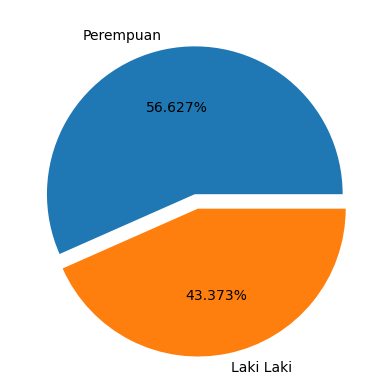

In [33]:
new_data=stroke_dataset[stroke_dataset['stroke']==1]
print(new_data['gender'].value_counts())
gender_data=list(new_data['gender'].value_counts())
print(gender_data)
plt.pie(gender_data,labels=['Perempuan', 'Laki Laki'],autopct='%.3f%%',explode = [0, 0.1])

plt.show

[141, 108]


<function matplotlib.pyplot.show(close=None, block=None)>

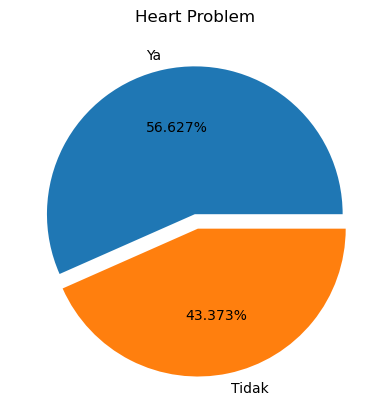

In [35]:
heart_disease=list(new_data['heart_disease'].value_counts())
print(gender_data)
plt.title('Heart Problem')
plt.pie(gender_data,labels=['Ya', 'Tidak'],autopct='%.3f%%',explode = [0, 0.1])

plt.show

Text(0.5, 1.0, 'Varian BMI')

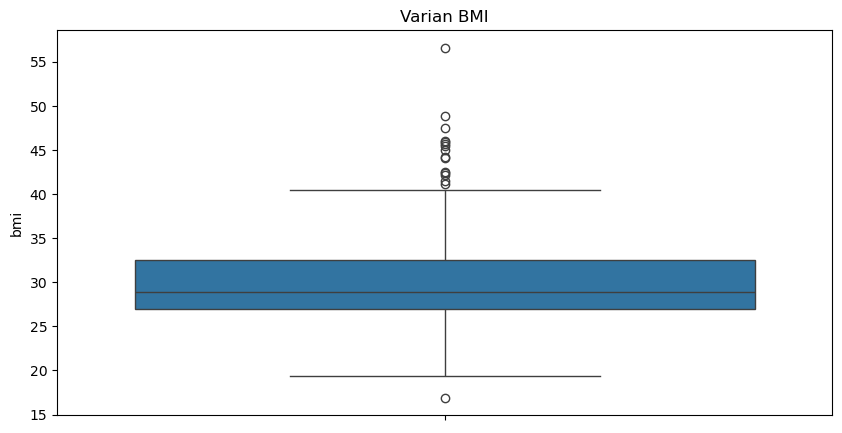

In [37]:
plt.figure(figsize=[10,5])
sns.boxplot(new_data['bmi'])
plt.title("Varian BMI")

In [39]:
d_list = stroke_dataset.select_dtypes(include = ['object']).columns.tolist()

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in d_list:
    le.fit(stroke_dataset[i])
    stroke_dataset[i] = le.transform(stroke_dataset[i])

In [43]:
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                5110 non-null   float64
 7   smoking_status     5110 non-null   int32  
 8   stroke             5110 non-null   int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 299.5 KB


In [45]:
from imblearn.over_sampling import SMOTE
import pandas as pd
# Pisahkan fitur dan target
X = stroke_dataset.drop('stroke', axis=1)
y = stroke_dataset['stroke']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Oversampling menggunakan SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cek jumlah sampel sebelum dan sesudah oversampling
print('Jumlah sampel sebelum oversampling:', len(X))
print('Jumlah sampel setelah oversampling:', len(X_resampled))

# Hasilkan ke dalam DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)

resampled_data.to_csv('stroke_oversampled.csv', index=False)

Jumlah sampel sebelum oversampling: 5110
Jumlah sampel setelah oversampling: 9722


In [47]:
stroke_dataset = pd.read_csv('stroke_oversampled.csv')

In [49]:
stroke_dataset['stroke'].value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [51]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pred2=model.predict(X_test)

0.9491392801251957


Text(0.5, 1.0, 'Confusion matrix for Random forest')

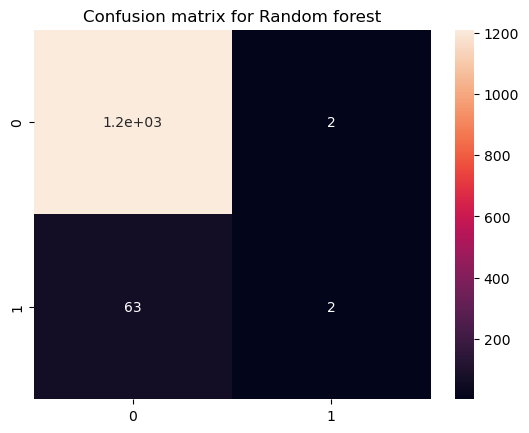

In [53]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,pred2)
sns.heatmap(cn,annot=True)
plt.title("Confusion matrix for Random forest")

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.50      0.03      0.06        65

    accuracy                           0.95      1278
   macro avg       0.73      0.51      0.52      1278
weighted avg       0.93      0.95      0.93      1278



In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {
    'n_estimators': np.arange(2, 10),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 5),
    'min_samples_leaf': np.arange(1, 5),
    'min_samples_split': np.arange(2, 5),
    'max_features': ['sqrt'],
    'random_state': [10]
}
rf_model = RandomForestClassifier()
rf_hyper_model = GridSearchCV(rf_model, param_grid=params)
rf_hyper_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4]),
                         'max_features': ['sqrt'],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [10]})

In [61]:
rf_hyper_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 3,
 'random_state': 10}

In [63]:
rf_hyper_model.score(X_test, y_test)

0.9491392801251957

In [65]:
import pickle
pickle.dump(rf_hyper_model, open('stroke.pkl', 'wb'))